**Import Important Libraries**

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Downloads/googleplaystore.csv" , encoding = 'UTF8')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

**1 - Drop duplicates :**

In [6]:
df.duplicated().sum() # The number of Duplicate is -> 483

483

In [7]:
df.drop_duplicates(inplace = True)  # Drop Duplicates

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**2 - Fix DataType :**

1) Handle Category Column :
- Check the values that are not really -> shows just one row has no real value (1.9).
- Modify the row to correct values directly in the DataFrame.

In [11]:
df['Category'].nunique()   # Number of unqiue values in Category Column

34

In [12]:
df['Category'].value_counts()  # Show unique values in this column

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [13]:
df[df['Category'] == '1.9'] # Show the row 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df.loc[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [15]:
# Determine the index that contains the wrong row
idx = 10472

# Corrected values
corrected_row = {
    'App': 'Life Made Wi-Fi Touchscreen Photo Frame',
    'Category': 'Photography',
    'Rating': 1.9,
    'Reviews': '19.0',
    'Size': '3.0M',
    'Installs': '1,000+',
    'Type': 'Free',
    'Price': '0',
    'Content Rating': 'Everyone',
    'Genres': 'Photography',
    'Last Updated': 'February 11, 2018',
    'Current Ver': '1.0.19',
    'Android Ver': '4.0 and up'
}

# Modify the row directly in the DataFrame
df.loc[idx] = corrected_row


In [16]:
df.loc[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made Wi-Fi Touchscreen Photo Frame,Photography,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Photography,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


2) Handle Reviews Column :
- Check the values that are not really numbers -> shows just one row has no number value (19.0).
- Convert 19.0 value to Numbers -> 19
- Convert Reviews Datatype to Integer -> Reviews int32

In [18]:
df[~df['Reviews'].str.isnumeric()] # Check the values that are not really numbers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made Wi-Fi Touchscreen Photo Frame,Photography,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Photography,"February 11, 2018",1.0.19,4.0 and up


In [19]:
df['Reviews'] = df['Reviews'].replace('19.0' , 19)      # Convert 19.0 value to Numbers
df['Reviews'] = df['Reviews'].astype(int)               # Convert Reviews Datatype to Integer

3) Handle Size Column :
- Extract the values that are not pure numbers (meaning they contain letters).
- Extracts any letters next to the number (To make sure)  ->  The values are 'M', 'Varies with device' , 'k'.
- Convert 'Varies with device' -> value to NaN.
- Convert the value is in Migabytes → to KB , By multiplying it by 1024.
- Convert 'K' to space -> to keep the all values by KB.

In [21]:
df[df['Size'].str.contains('[A-Za-z]' , na = False)]['Size'].unique() # Extract the values that are not pure numbers (meaning they contain letters)

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [22]:
df[df['Size'] == 'Varies with device']['Size'] # Number of 'Varies with device' -> 1526

37       Varies with device
42       Varies with device
52       Varies with device
67       Varies with device
68       Varies with device
                ...        
10713    Varies with device
10725    Varies with device
10765    Varies with device
10826    Varies with device
10839    Varies with device
Name: Size, Length: 1526, dtype: object

In [23]:
def convert_size(size):
    if isinstance(size , str):         # Modify str only To avoid (Number , NaN)
        size = size.strip()
        if size.endswith('M'):         # If the value is in megabytes → convert it to KB By multiplying it by 1024.
            return float(size.replace('M' , '')) * 1024
        elif size.endswith('K'):       # If the value is in kilobytes 
            return float(size.replace('K' , '')) 
        elif 'Varies with device' in size :       # If it is written varies with device
            return np.nan
    return np.nan       

df['Size'] = df['Size'].apply(convert_size)    

4) Handle Installs Column :
- Extract the Unique values.
- Convert '+' , ',' to space.
- Convert Installs Datatype to Integer -> Installs int32.

In [25]:
df['Installs'].value_counts()  # Extract the Unique values.

Installs
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             891
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: count, dtype: int64

In [26]:
df['Installs'] = df['Installs'].str.replace('+' , '')    # Convert '+'  to space
df['Installs'] = df['Installs'].str.replace(',' , '')    # Convert ',' to space
df['Installs'] = df['Installs'].astype(int)               # Convert Installs Datatype to Integer

In [27]:
df['Type'].value_counts()  # Extract the Unique values.

Type
Free    9592
Paid     765
Name: count, dtype: int64

5) Handle Price Column :
- Extract the unique values.
- Remove '$' from Price..
- Convert Price Datatype to Integer -> Price float64.

In [29]:
df['Price'].unique() # Extract the unique values 

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [30]:
df['Price'] = df['Price'].str.strip('$')                  # Remove '$'  from Price
df['Price'] = df['Price'].astype(float)                   # Convert Price Datatype to Integer -> Price float64

In [31]:
df[df['Price'] == 0.00]['Price']   # Show the number of zero value in column Price -> 9593

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9593, dtype: float64

6) Handle Content Rating Column :
- Extract the Unique values.
- Convert 'Unrated' -> to Null_value (NaN) .

In [33]:
df['Content Rating'].value_counts()  # Extract the Unique values.

Content Rating
Everyone           8383
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [34]:
df['Content Rating'] = df['Content Rating'].replace('Unrated' , np.nan)  # Convert 'Unrated' -> to Null_value (NaN) .

7) Handle Genres Column :
- Extract the Unique values.
- Split Genres by ';' and Extract string before sign ';' -> Assign in variable Before_Genres.
- Split Genres by ';' and Extract string after sign ';' -> Assign in variable After_Genres.
- Comparing the two [Before_Genres,After_Genres] , the difference is not big.
- I use The After_Genres to Data.

In [36]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [37]:
# Split Genres by ';' and Extract string before sign ';'
df['Before_Genres'] = df['Genres'].apply(lambda x : x.split(';')[0].strip())  

# Split Genres by ';' and Extract string After sign ';'
df['After_Genres'] = df['Genres'].apply(lambda x : x.split(';')[1].strip() if ';' in x else x.split(';')[0].strip()) 

In [38]:
df['Before_Genres'].nunique() # Extract The Number of unique values 

48

In [39]:
df['After_Genres'].nunique() # Extract The Number of unique values 

52

8) Handle Last Updated Column :
- Convert Last Updated to Datetime.

In [41]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'] , errors='coerce') # Convert Last Updated to Datetime

9) Handle Current Ver Column :
- Extract the values that are not pure numbers (meaning they contain letters).
- Convert 'Varies with device' -> to Null Value.

In [43]:
# Extract the values that are not pure numbers (meaning they contain letters)
df[df['Current Ver'].str.contains('[A-Za-z]' , na = False)]['Current Ver'].unique() 

array(['Varies with device', '2.20 Build 02', '3.0.1.11 (Build 311)',
       '3.4.3_world', 'R6.0.3', '1.60.0.31354-release',
       '37.1.206017801.DR37_RC14', '4.4B', '1.308.us', '3.8.75a',
       '4.9.2 (Oasis)', '1.5-beta', '3.6.0.115_FN', '1.5-play',
       '1.1.1-play', 'v1.8b22p13', '2.3.34 Prod', 'Cannonau 3.11.11',
       '8.0bld14', '4.1.1-0-prod', '3.04 - Beta', '3.2.0d',
       '2.76.2.0-android', 'p5.7.1', '7.3.4-play', 'Public.Heal',
       '1.31.0-15160.950adac99', 'v3.1.1', '2.4.12-r244', 'Version:6.97',
       '3.8.5.Go', '1.2.3-play', '3.2.0h', '1.10.0.user.pro.release',
       '4.1.5 (Steglitz)', '1.830.0.564-(e405bb2)', '1.2.3-DEBUG',
       '1.0 Super Ear Hearing', 'PN.1.0', 'Initial', '2.5.0 b665',
       '1.4.15-free', 'T4.6.5-tl2.0.1', '50.2 lite', '2.9.9go',
       '10.9.8 (Play)', '11.0.269 (m)', 'v5.4.3', 'v3.7.93',
       'MyMetro_HTML_2.0_430029', 'v8.0.1.8.0629.1', '4.5.28_ww',
       'v7.0.7.1.0625.1_06_0629', 'v7.0.9.1.0526.1_06_0704',
       '1.8.203182

In [44]:
df[df['Current Ver'] == 'Varies with device']['Current Ver'] # Number of 'Varies with device' -> 1302

3        Varies with device
37       Varies with device
42       Varies with device
52       Varies with device
67       Varies with device
                ...        
10725    Varies with device
10765    Varies with device
10826    Varies with device
10839    Varies with device
10840    Varies with device
Name: Current Ver, Length: 1302, dtype: object

In [45]:
df['Current Ver'] = df['Current Ver'].replace('Varies with device' , np.nan) # Convert 'Varies with device' value to Null value

10) Handle Android Ver Column :
- Extract the values that are not pure numbers (meaning they contain letters).
- Extract Number only.
- Convert 'Varies' -> to Null Value.
- Convert 'W' -> to space.

In [47]:
# Extract the values that are not pure numbers (meaning they contain letters)
df[df['Android Ver'].str.contains('[A-Za-z]' , na = False)]['Android Ver'].unique() 

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '2.0 and up', '3.2 and up',
       '4.4W and up', '7.1 and up', '8.0 and up', '3.1 and up',
       '2.0.1 and up', '1.0 and up'], dtype=object)

In [48]:
df[df['Android Ver'] == 'Varies with device']['Android Ver'] # Number of 'Varies with device' -> 1221

42       Varies with device
52       Varies with device
67       Varies with device
68       Varies with device
85       Varies with device
                ...        
10713    Varies with device
10765    Varies with device
10826    Varies with device
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 1221, dtype: object

In [49]:
df['Android Ver'] = df['Android Ver'].str.split(' ').str[0]      # Extract Number only 
df['Android Ver'] = df['Android Ver'].replace("Varies" , np.nan) # Convert 'Varies' to Null Value 
df['Android Ver'] = df['Android Ver'].str.replace('W' , '')      # Convert 'W' to space

In [50]:
df['Android Ver'].value_counts() # Extract the Unique values after update

Android Ver
4.1      2380
4.0.3    1453
4.0      1338
4.4       905
2.3       643
5.0       550
4.2       387
2.3.3     279
2.2       240
3.0       237
4.3       235
2.1       133
1.6       116
6.0        58
7.0        43
3.2        36
2.0        32
5.1        22
1.5        20
3.1        10
2.0.1       7
8.0         6
7.1         3
1.0         2
Name: count, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          8893 non-null   float64       
 3   Reviews         10358 non-null  int32         
 4   Size            8517 non-null   float64       
 5   Installs        10358 non-null  int32         
 6   Type            10357 non-null  object        
 7   Price           10358 non-null  float64       
 8   Content Rating  10356 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10358 non-null  datetime64[ns]
 11  Current Ver     9048 non-null   object        
 12  Android Ver     9135 non-null   object        
 13  Before_Genres   10358 non-null  object        
 14  After_Genres    10358 non-null  object        
dtypes: date

In [52]:
df.isnull().sum()  # The number of Null values in column

App                  0
Category             0
Rating            1465
Reviews              0
Size              1841
Installs             0
Type                 1
Price                0
Content Rating       2
Genres               0
Last Updated         0
Current Ver       1310
Android Ver       1223
Before_Genres        0
After_Genres         0
dtype: int64

**3 - Handle Missing Values :**

In [54]:
# Replace missing Rating values with median according to After_Genres
df['Rating'] = df.groupby('After_Genres')['Rating'].transform(lambda x : x.fillna(x.median()))

In [55]:
# Replace missing Size values with median according to After_Genres
df['Size'] = df.groupby('After_Genres')['Size'].transform(lambda x : x.fillna(x.median()))

In [56]:
# Replace missing Current Ver values with mode according to After_Genres
df['Current Ver'] = df.groupby('After_Genres')['Current Ver'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
)

In [57]:
# Replace missing Android Ver values with mode according to After_Genres
df['Android Ver'] = df.groupby('After_Genres')['Android Ver'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
)

In [58]:
df.isnull().sum()  # The number of Null values in column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    2
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Before_Genres     0
After_Genres      0
dtype: int64

In [59]:
df.dropna(inplace=True)  # Drop The NULL Values 

In [60]:
df.shape

(10355, 15)

**4 - Analysis(Visualization) :**

1 - What is the most expensive app on the Play Store?
- The "I'm Rich - Trump Edition" is the expensive app on the play store.

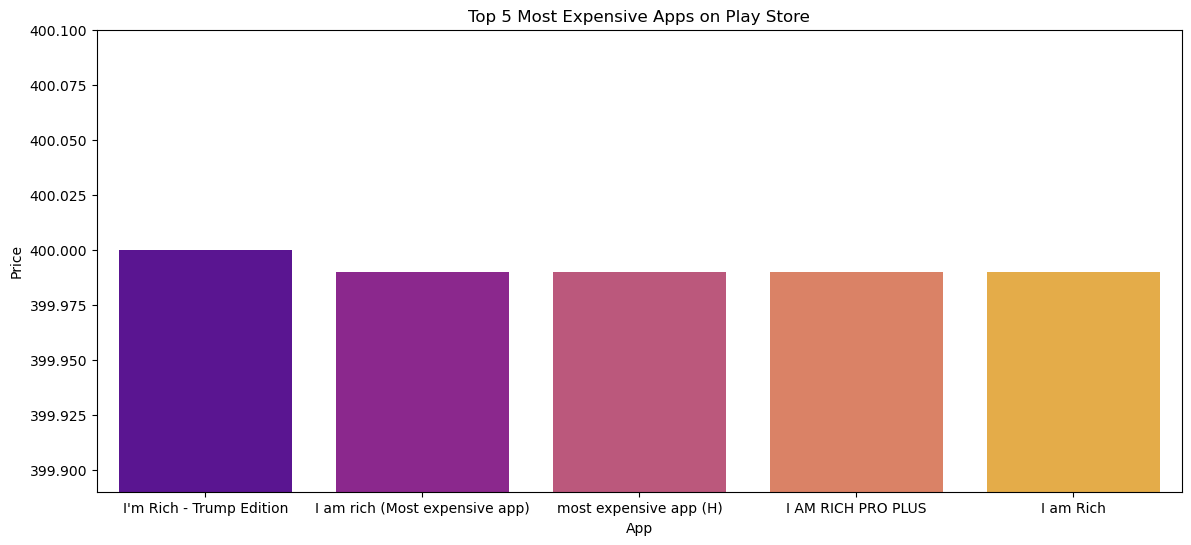

In [63]:
# Extract The top 5 of the Price 
top_5 = df.sort_values(by = 'Price' , ascending = False).head(5)

# seaborn
plt.figure(figsize=(14,6))
sns.barplot(data = top_5 , x = 'App' , y = 'Price' , palette='plasma')
plt.ylim(top_5['Price'].min() - 0.1, top_5['Price'].max() + 0.1)
plt.title('Top 5 Most Expensive Apps on Play Store')
plt.xlabel('App')
plt.ylabel('Price')
plt.show()

2 - Which genre has the highest number of apps?
- The 'Tools' is the highest number of apps.

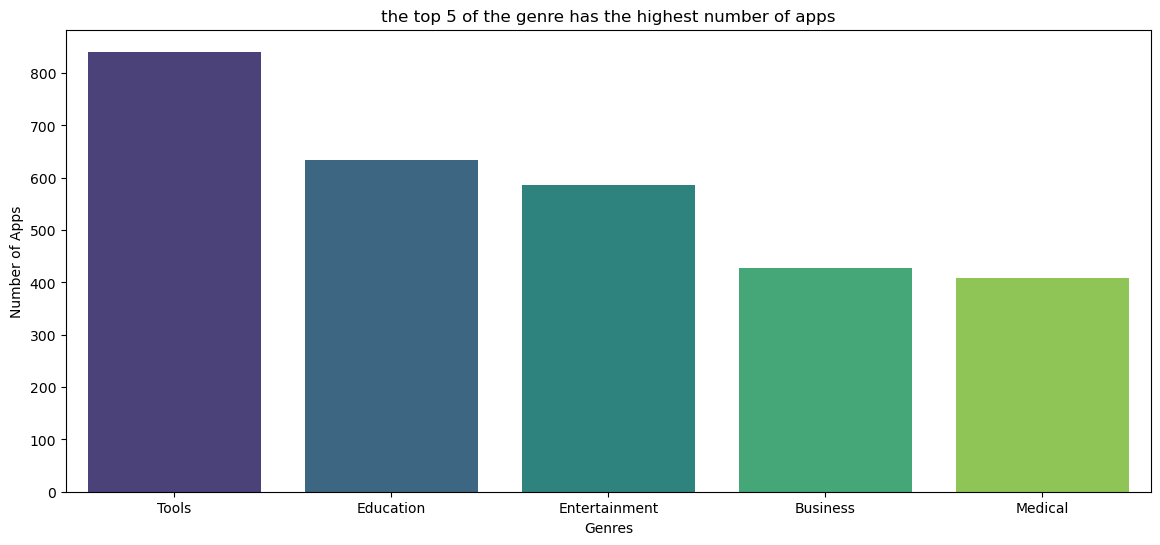

In [65]:
# Extract Top 5 Genres with Most Apps
genere = df.groupby('After_Genres')['App'].count().reset_index()
top_5 = genere.sort_values(by = 'App' , ascending = False).head(5)

# seaborn
plt.figure(figsize=(14,6))
sns.barplot(data = top_5 , x = 'After_Genres' , y = 'App' , palette='viridis')
plt.title('the top 5 of the genre has the highest number of apps')
plt.xlabel('Genres')
plt.ylabel('Number of Apps')
plt.show()

3 - What is the average size of free vs. paid apps? 
- The average size of the 'free' app is 21062.21 KB &  The average size of the 'paid' app is 20014.65 KB.

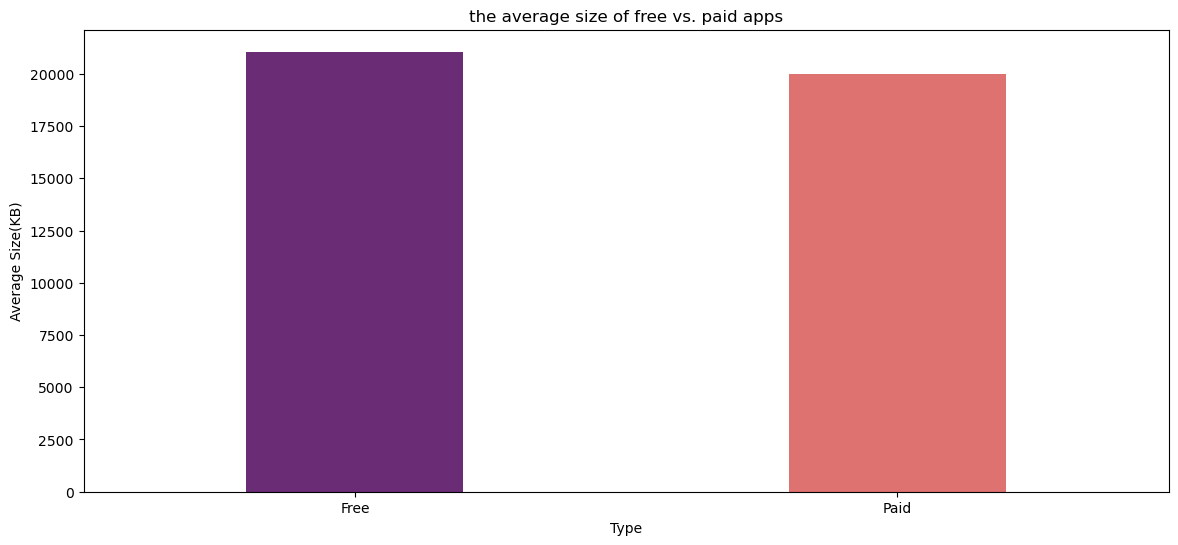

In [67]:
# Extract the average size of the type Apps
avg_size = df.groupby('Type')['Size'].mean().reset_index()

# seaborn
plt.figure(figsize=(14,6))
sns.barplot(data = avg_size , x = 'Type' , y = 'Size' , palette='magma' , width=0.4)
plt.title('the average size of free vs. paid apps')
plt.xlabel('Type')
plt.ylabel('Average Size(KB)')
plt.show()

4 - What are the top 5 most expensive apps with a perfect rating (5)?
- The top 5 most expensive apps are : 1) "AP Art History Flashcards" -  2) "USMLE Step 2 CK Flashcards" - 3) "Hey AJ! It's Bedtime!" -
4) "meStudying: AP English Lit" - 5) "TI-84 CE Graphing Calculator Manual TI 84" .

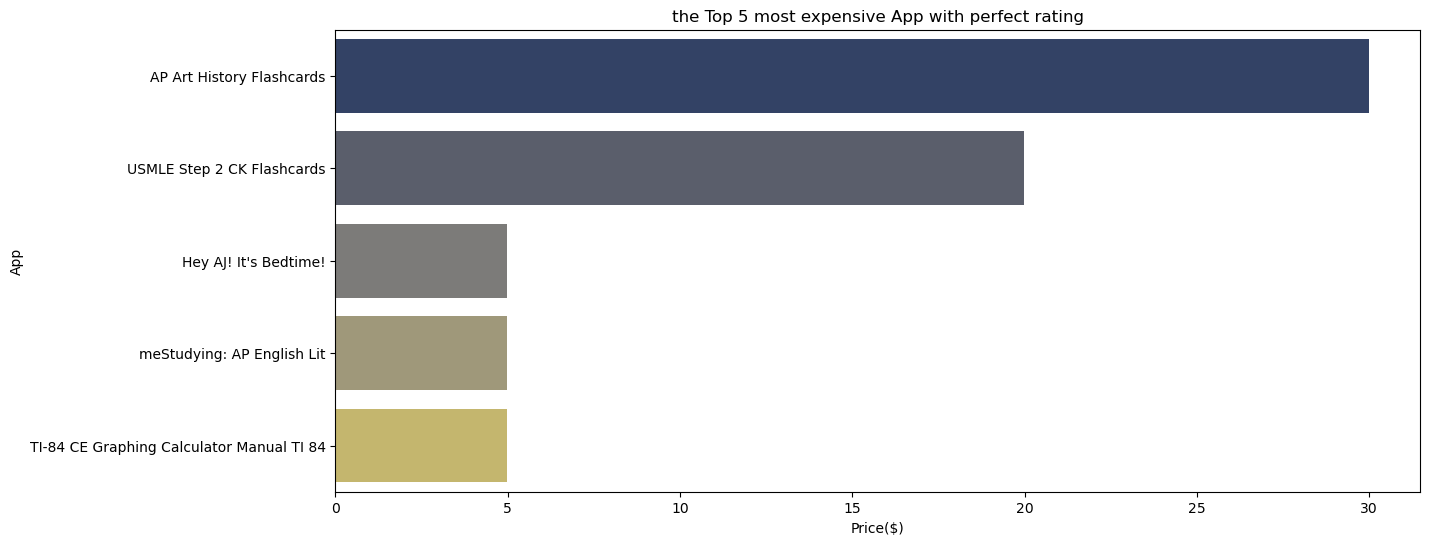

In [69]:
# Filter apps with perfect rating (5.0)
rating_5 = df[df['Rating'] == 5.0]

# Extract top 5 most expensive App
top_5 = rating_5.sort_values(by='Price', ascending=False).head(5)

# seaborn
plt.figure(figsize=(14,6))
sns.barplot(data = top_5 , x = 'Price' , y = 'App' , palette='cividis')
plt.title('the Top 5 most expensive App with perfect rating')
plt.xlabel('Price($)')
plt.ylabel('App')
plt.show()

5 - How many apps have received more than 50K reviews?
- "24.38%" apps have received more than 50K reviews -> 2524 Apps.
- "75.62%" apps have received less than or equal 50K reviews -> 7830 Apps.

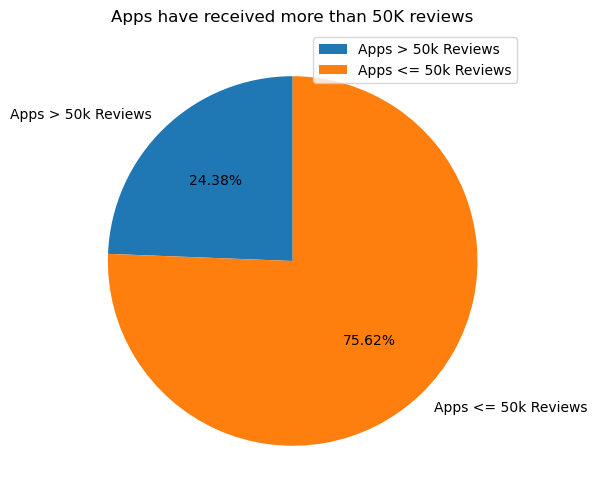

In [71]:
values = [(df['Reviews'] > 50000).sum() , (df['Reviews'] <= 50000).sum()]
labels = ['Apps > 50k Reviews' , 'Apps <= 50k Reviews']

# matplotlib
plt.figure(figsize=(14,6))
plt.pie(x = values , labels = labels , startangle=90 , autopct = '%1.2f%%' )
plt.legend (loc='upper right')
plt.title('Apps have received more than 50K reviews')
plt.show()

6 - What is the average price of apps, grouped by genre and number of installs?
- Genres such as Finance, Lifestyle,  Medical and productivity show higher average prices (dark red color), especially when the number of installs is low(0).
-> This indicates that apps in these categories are often paid or premium apps with limited downloads.

- On the other hand, genres like Entertainment, Education, and Productivity tend to have low average prices (light yellow) across most install ranges.
-> These apps are usually free or low-cost and attract a much larger user base.

- **Overall, there is an inverse relationship between app price and number of installs — as prices decrease, installs tend to increase.**

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


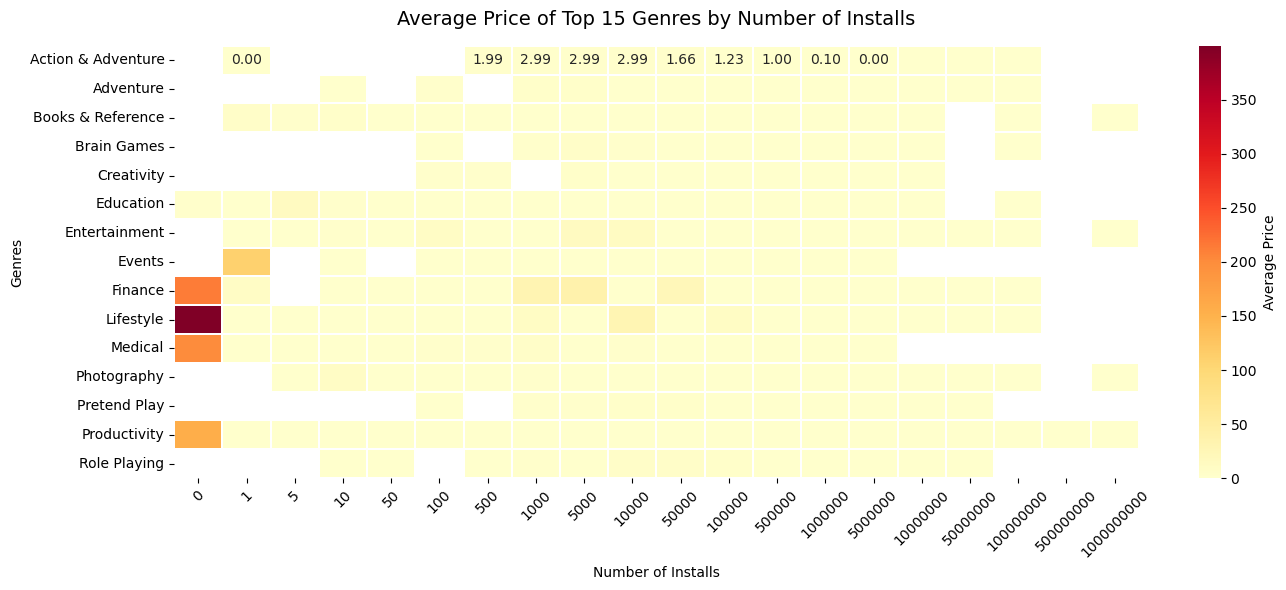

In [73]:
# Extract the average Price of the Genres & Installs App
avg_price = df.groupby(['After_Genres','Installs'])['Price'].mean().reset_index()

# Take the top 15 genres with the highest average prices.
top_genres = avg_price.groupby('After_Genres')['Price'].mean().nlargest(15).index
filtered = avg_price[avg_price['After_Genres'].isin(top_genres)]

pivot = filtered.pivot_table(values='Price', index='After_Genres', columns='Installs')

plt.figure(figsize=(14,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.3, cbar_kws={'label': 'Average Price'})
plt.title('Average Price of Top 15 Genres by Number of Installs', fontsize=14, pad=15)
plt.xlabel('Number of Installs')
plt.ylabel('Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7 - How many apps have a rating higher than 4.7, and what is their average price?
- The number of apps with rating > (4.7) is : 586.
- The number of apps with rating <= (4.7) is : 9768.
- The average price of apps with rating > (4.7) is : 0.45$.
    
- The average price of apps with rating <= (4.7) is : 1.06$.
    
- **Overall, there is an inverse relationship between app price and Ratings — as Ratings increase , Prices tend to decrease.**

In [75]:
# The number of apps with rating > (4.7)
count_high_ratings = df[df['Rating'] > 4.7].shape[0]

# The number of apps with rating <= (4.7)
count_low_ratings = df[df['Rating'] <= 4.7].shape[0]

# The average price of apps with rating > (4.7)
avg_high_ratings = df[df['Rating'] > 4.7]['Price'].mean()

# The average price of apps with rating <= (4.7)
avg_low_ratings = df[df['Rating'] <= 4.7]['Price'].mean()

data = pd.DataFrame({
    'Apps': ['apps_with_rating > 4.7' , 'apps_with_rating <= 4.7'],
    'Count_Rating': [count_high_ratings , count_low_ratings],
    'Avg_Price' : [avg_high_ratings , avg_low_ratings]
})

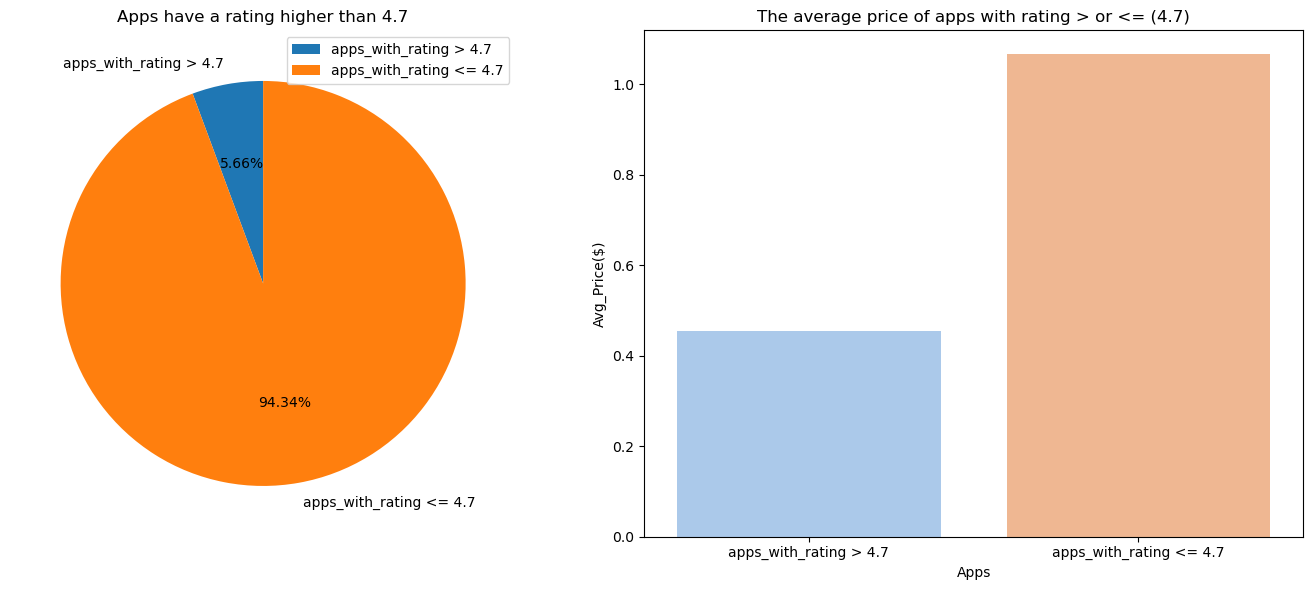

In [76]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(x = data['Count_Rating'] , labels = data['Apps'] , startangle = 90 , autopct = '%1.2f%%')
plt.legend(loc = 'upper right')
plt.title('Apps have a rating higher than 4.7')

plt.subplot(1,2,2)
sns.barplot(data = data , x = 'Apps' , y = 'Avg_Price' , palette = 'pastel')
plt.title('The average price of apps with rating > or <= (4.7)')
plt.xlabel('Apps')
plt.ylabel('Avg_Price($)')

plt.tight_layout()
plt.show()

8 - What is Google's estimated revenue from apps with 5,000,000+ installs? 
-- (Assuming Google takes a 30% cut from app sales)

- The Total Revenue with = 5,000,000+ installs App is : 0$.

- The Total Revenue with < 5,000,000+ installs App is : 65331554.337$.

- The Total Revenue with > 5,000,000+ installs App is : 44910000.0$.

In [78]:
# Filter apps with installs (5,000,000+)
low_installs = df[df['Installs'] == 5000000]

# Calculate Total Sales 
low_installs['Total_Sales'] = 500000 * low_installs['Price']

# Calculate Revenue [sum(Total_Sales) * 30%] 
low_revenue = low_installs['Total_Sales'].sum() * 0.3

# Filter apps with installs is greater than (5,000,000+)
medium_installs = df[df['Installs'] > 5000000]

# Calculate Total Sales 
medium_installs['Total_Sales'] = medium_installs['Installs'] * medium_installs['Price']

# Calculate Revenue [sum(Total_Sales) * 30%] 
medium_revenue = medium_installs['Total_Sales'].sum() * 0.3

# Filter apps with installs is lower than (5,000,000+)
high_installs = df[df['Installs'] < 5000000]

# Calculate Total Sales 
high_installs['Total_Sales'] = high_installs['Installs'] * high_installs['Price']

# Calculate Revenue [sum(Total_Sales) * 30%] 
high_revenue = high_installs['Total_Sales'].sum() * 0.3

C:\Users\DELL\AppData\Local\Temp\ipykernel_12964\4114744187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_installs['Total_Sales'] = 500000 * low_installs['Price']
C:\Users\DELL\AppData\Local\Temp\ipykernel_12964\4114744187.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_installs['Total_Sales'] = medium_installs['Installs'] * medium_installs['Price']
C:\Users\DELL\AppData\Local\Temp\ipykernel_12964\4114744187.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [79]:
low_installs['Type'].value_counts()  # Apps with installs (5,000,000+) are Free , So the Google's estimated revenue are Zero

Type
Free    683
Name: count, dtype: int64

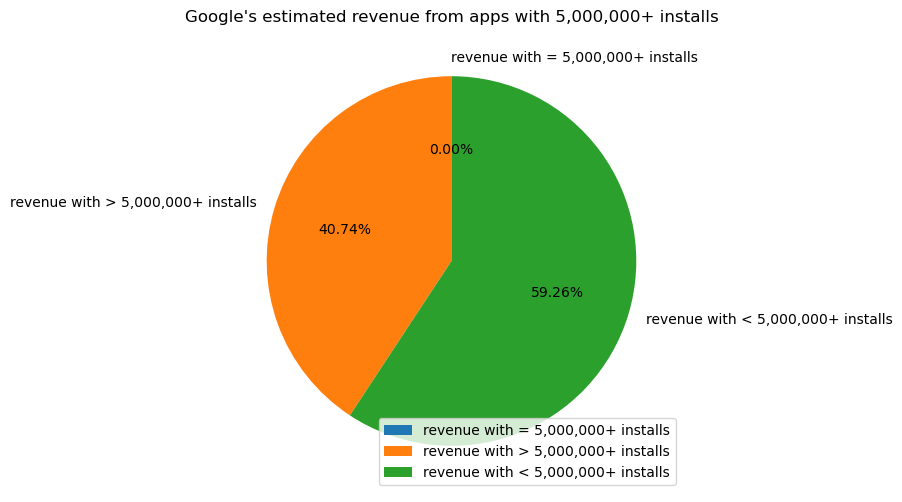

In [80]:
values = [low_revenue , medium_revenue , high_revenue]
labels = ['revenue with = 5,000,000+ installs' , 'revenue with > 5,000,000+ installs' , 'revenue with < 5,000,000+ installs']

# matplotlib
plt.figure(figsize=(14,6))
plt.pie(x = values , labels = labels , startangle=90 , autopct = '%1.2f%%' )
plt.legend (loc='lower right')
plt.title("Google's estimated revenue from apps with 5,000,000+ installs")
plt.show()

9 - What are the maximum and minimum sizes of free vs. paid apps?
- The maximum size of the 'free' & 'paid' app is 102400.0 KB.
- The minimum size of the 'free' & 'paid' app is 1024.0 KB.

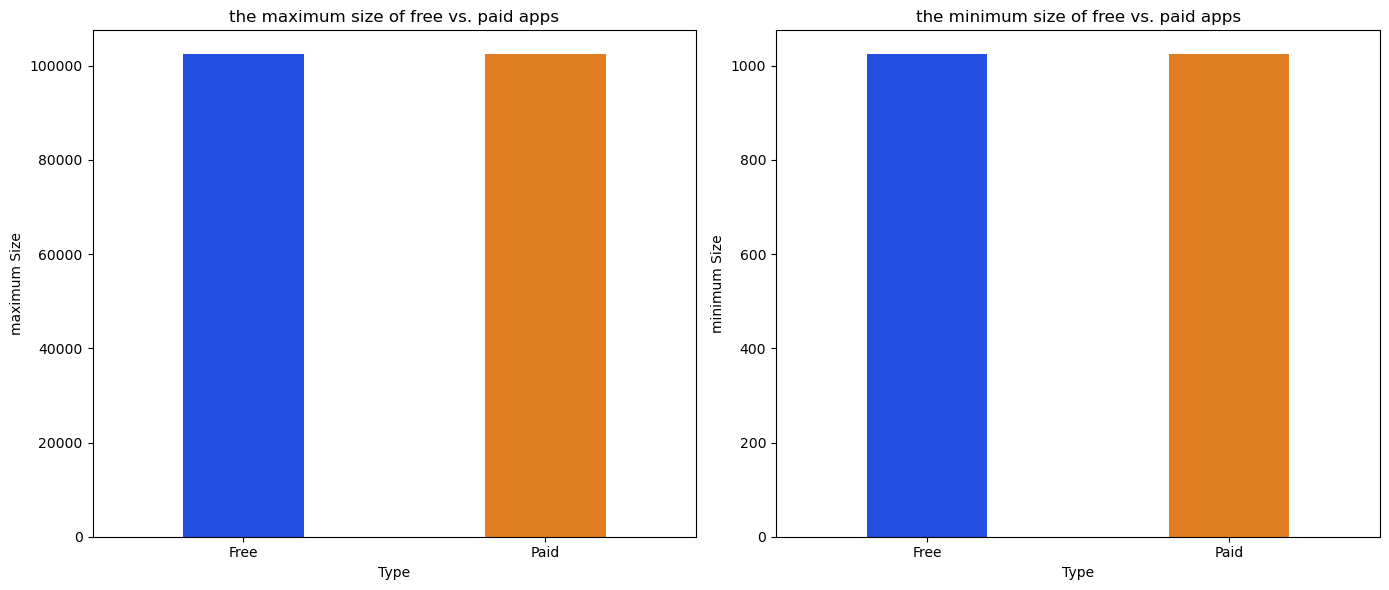

In [82]:
# Extract the maximum size of the type Apps
max_size = df.groupby('Type')['Size'].max().reset_index()

# Extract the minimum size of the type Apps
min_size = df.groupby('Type')['Size'].min().reset_index()

# seaborn
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data = max_size , x = 'Type' , y = 'Size' , palette='bright' , width=0.4)
plt.title('the maximum size of free vs. paid apps')
plt.xlabel('Type')
plt.ylabel('maximum Size')

plt.subplot(1,2,2)
sns.barplot(data = min_size , x = 'Type' , y = 'Size' , palette='bright' , width=0.4)
plt.title('the minimum size of free vs. paid apps')
plt.xlabel('Type')
plt.ylabel('minimum Size')

plt.tight_layout()
plt.show()

10 - Is there a correlation between an app’s rating, number of reviews, size, and its price?
1) Rating vs. Reviews: 
- there is an Direct relationship between app Rating and Reviews -> Apps with more reviews tend to have slightly higher ratings, but the relationship is very weak.
2) Rating vs. Size:
- there is an Direct relationship between app Rating and Size -> Larger app size might be associated with a small increase in rating, but the effect is almost negligible.
3) Rating vs. Price:
- there is an Inverse relationship between app Rating and Price -> Paid apps may have slightly lower ratings.
4) Reviews vs. Size:
- there is an Direct relationship between app Reviews and Size -> Larger apps tend to receive a bit more reviews, but the correlation is still weak.
5) Reviews vs. Price:
- there is an Inverse relationship between app Reviews and Price -> App price does not strongly affect the number of reviews.
6) Size vs. Price:
- there is an Inverse relationship between app Size and Price -> Paid apps may have slightly lower size.

In [84]:
corr = df.loc[:, ['Rating' , 'Reviews' , 'Size' , 'Price']].corr()
corr

,Rating,Reviews,Size,Price
Rating,1.000000,0.063698,0.054731,-0.019520
Reviews,0.063698,1.000000,0.103475,-0.009419
Size,0.054731,0.103475,1.000000,-0.019656
Price,-0.019520,-0.009419,-0.019656,1.000000


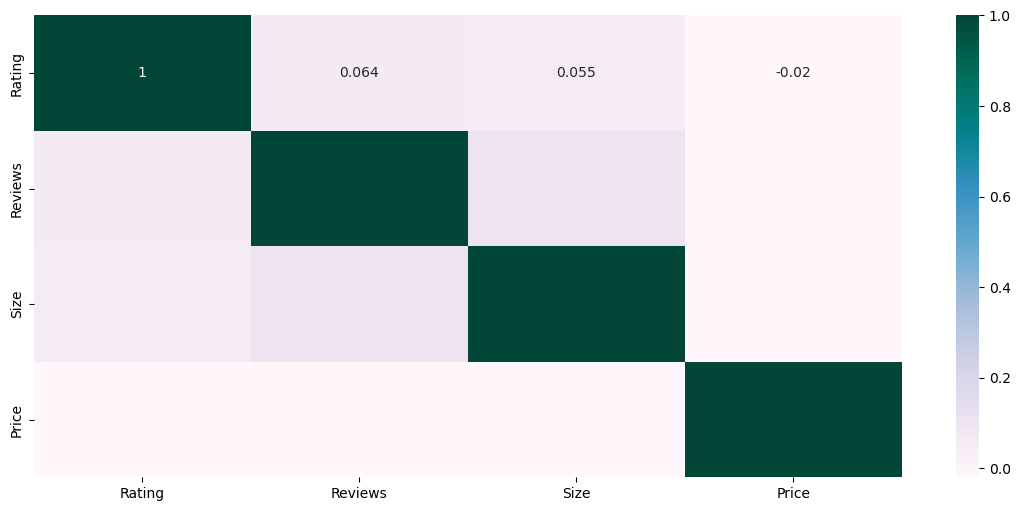

In [85]:
# seaborn
plt.figure(figsize=(14,6))
sns.heatmap(corr , annot= True , cmap = 'PuBuGn')
plt.show()

11 - How many apps exist for each type (free/paid) across different content ratings?
- The majority of apps are free, regardless of content rating.

- The "Everyone" category dominates, having the highest number of both free and paid apps.

- Teen and "Everyone 10+" content ratings have significantly fewer apps compared to "Everyone".

- Very few apps are rated "Mature 17+", and almost none are for "Adults only 18+".

- Overall, free apps largely outnumber paid apps in every content rating category.

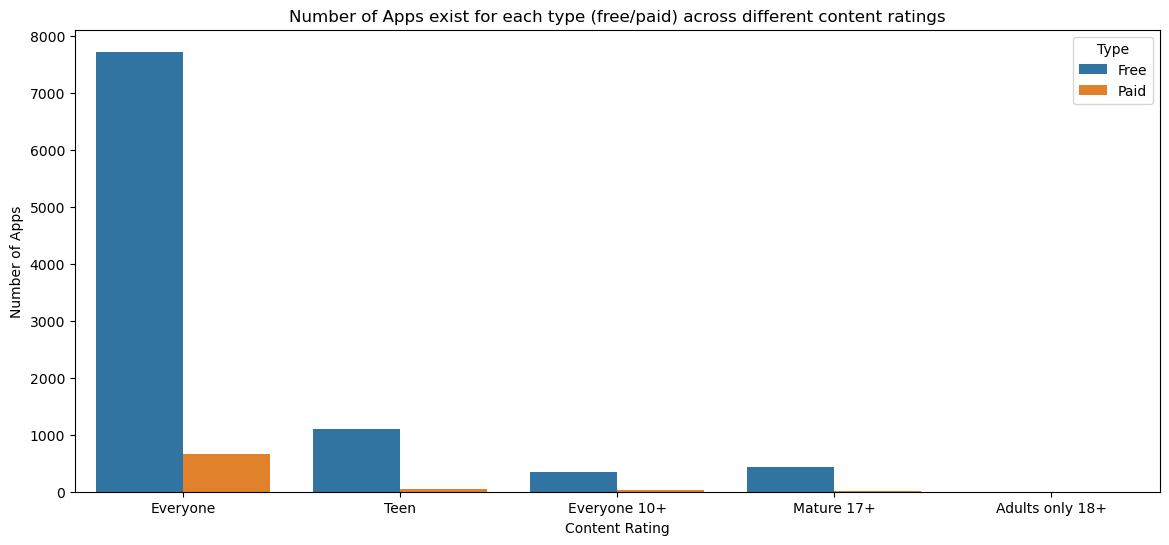

In [87]:
# seaborn
plt.figure(figsize=(14,6))
sns.countplot(data = df , x = 'Content Rating' , hue = 'Type')
plt.title('Number of Apps exist for each type (free/paid) across different content ratings')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()

12 - How many apps are compatible with Android version 4.x?
- "76.46%" Apps are compatible with Android version 4.x -> 7917 Apps.
- "23.54%" Apps are NOT compatible with Android version 4.x -> 2438 Apps.

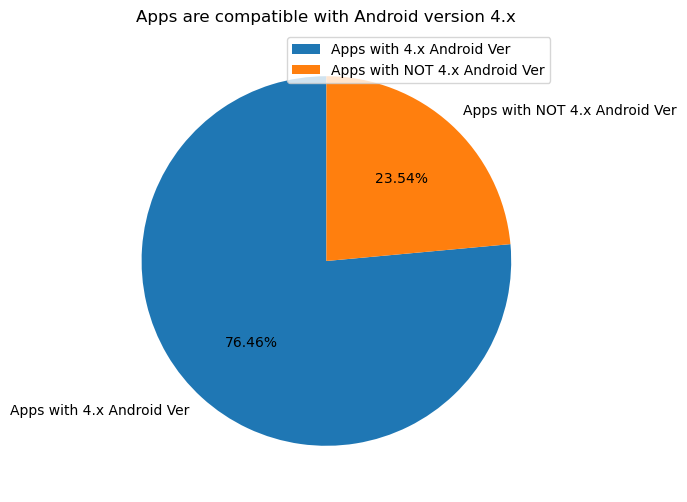

In [89]:
# Filter apps with Android version 4.x
apps_version_4x = df[df['Android Ver'].str.startswith('4')].shape[0]

# Filter apps with NOT Android version 4.x
apps_version_xx = df[~df['Android Ver'].str.startswith('4')].shape[0]

values = [apps_version_4x , apps_version_xx]
labels = ['Apps with 4.x Android Ver' , 'Apps with NOT 4.x Android Ver']

# matplotlib
plt.figure(figsize=(14,6))
plt.pie(x = values , labels = labels , startangle=90 , autopct = '%1.2f%%' )
plt.legend (loc='upper right')
plt.title('Apps are compatible with Android version 4.x')
plt.show()